Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
df = pd.read_csv("online_retail.csv", encoding="latin1")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Data Cleaning

In [6]:
df.dropna(subset=["CustomerID"], inplace=True)  # Remove rows with missing CustomerID
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])  # Convert to datetime
df = df[df["Quantity"] > 0]  # Remove negative quantities
df = df[df["UnitPrice"] > 0]  # Remove negative prices

Add total sales column

In [7]:
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]

# 1. Basic Statistics

In [8]:
summary_stats = df.describe()
info = df.info()
print(summary_stats)
print(info)

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalSales   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB
            Quantity                    InvoiceDate      UnitPrice  \
count  397884.000000                         397884  397884.000000   
mean       12.988238  2011-07-10 23:41:23.511023360       3.116488   
min         1.000000            2010-12-01 08:26:00  

# 2. Sales Trends Over Time

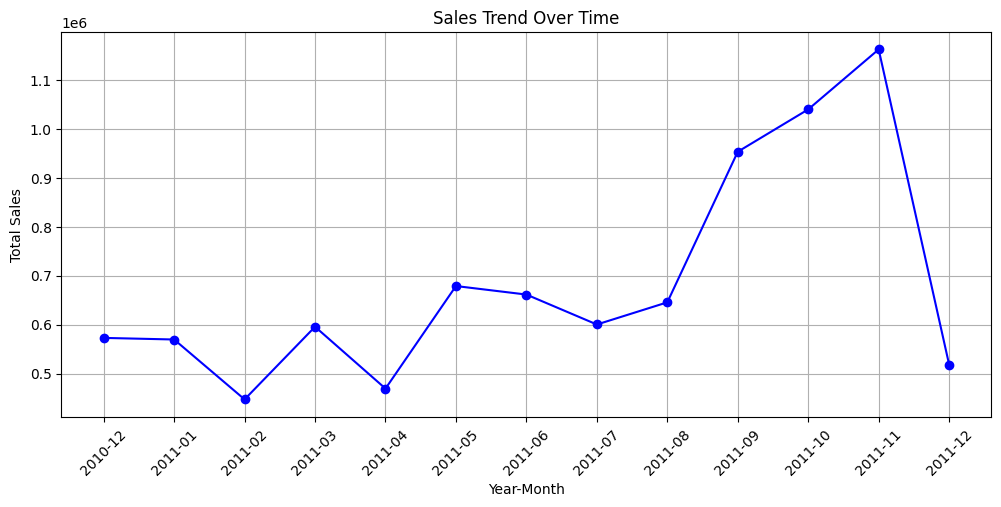

In [9]:
df["InvoiceYearMonth"] = df["InvoiceDate"].dt.to_period("M")
sales_trend = df.groupby("InvoiceYearMonth")["TotalSales"].sum()

plt.figure(figsize=(12, 5))
plt.plot(sales_trend.index.astype(str), sales_trend.values, marker="o", linestyle="-", color="b")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 3. Top 10 Selling Products

C:\Users\Addmin\AppData\Local\Temp\ipykernel_1620\1155537747.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


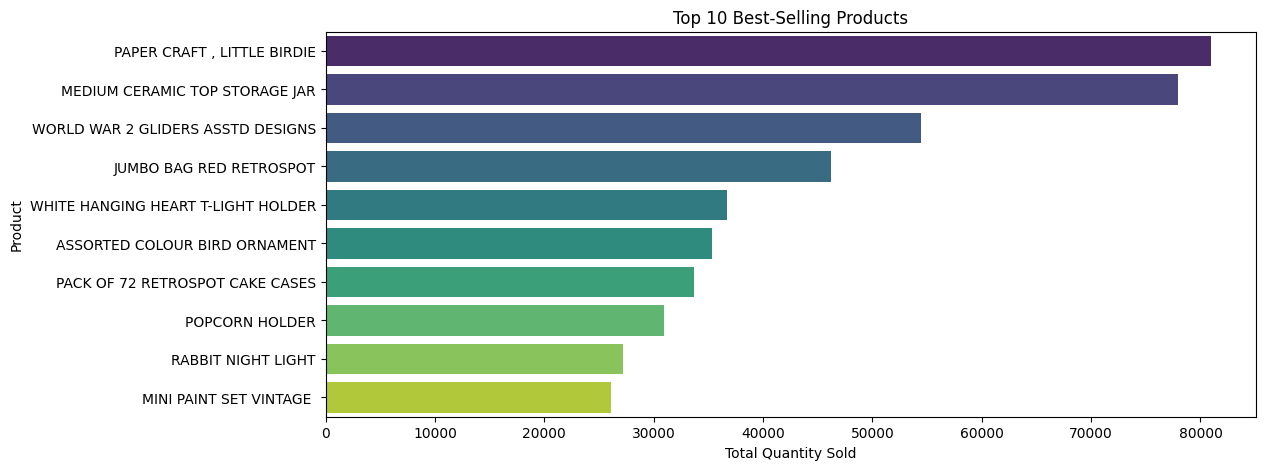

In [19]:
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.title("Top 10 Best-Selling Products")
plt.show()

# 4. Top Countries by Revenue

C:\Users\Addmin\AppData\Local\Temp\ipykernel_1620\1627092765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")


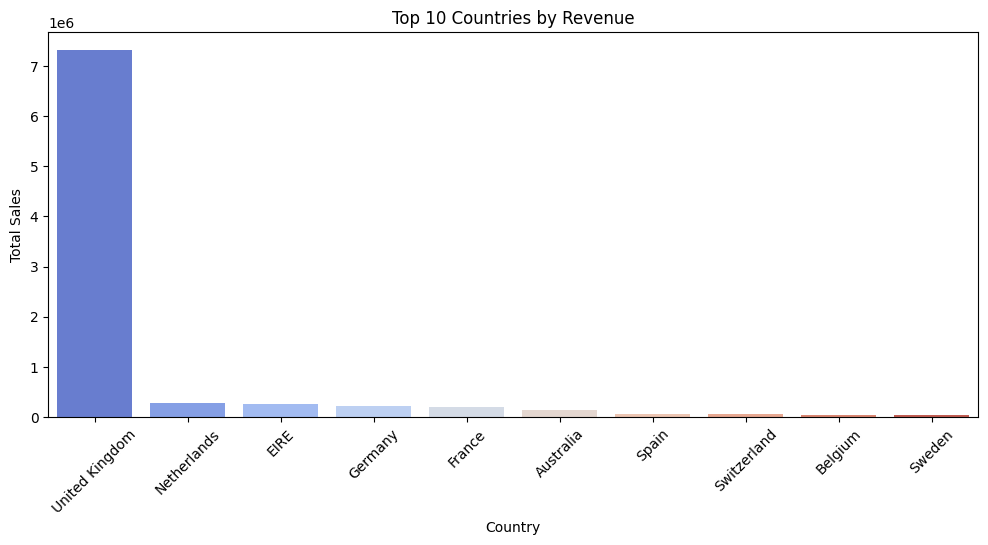

In [16]:
top_countries = df.groupby("Country")["TotalSales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.title("Top 10 Countries by Revenue")
plt.xticks(rotation=45)
plt.show()

# 5. Customer Purchasing Behavior

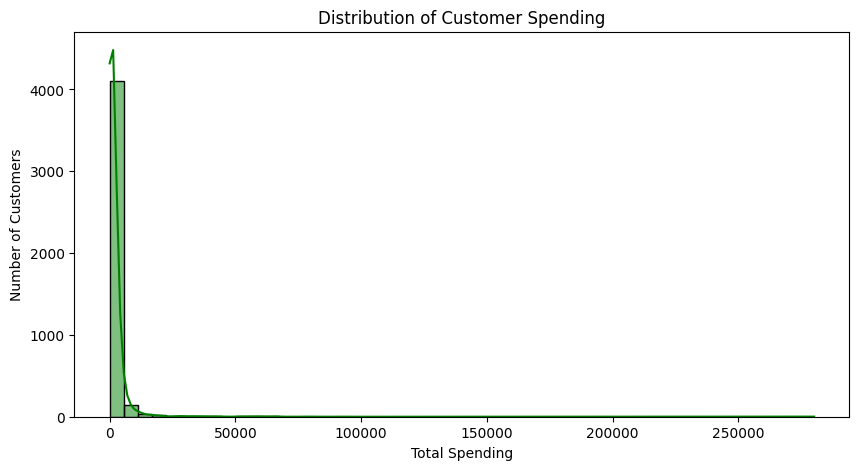

Data Analysis Completed Successfully!


In [17]:
customer_spending = df.groupby("CustomerID")["TotalSales"].sum()

plt.figure(figsize=(10, 5))
sns.histplot(customer_spending, bins=50, kde=True, color="g")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Spending")
plt.show()

print("Data Analysis Completed Successfully!")